In [1]:
from my_functions import *

# Nearest Centroid Classifier (NCC)

In [2]:
class NCC:
    def fit(self, X:pd.DataFrame, y:list):
        X['label'] = y
        # Train:
        self.centroids = []
        # for in unique label
        for label_name in X.label.unique():
            # get only the elements with that label
            label_elements = X[X.label==label_name]
            # remove label column
            label_elements = label_elements.drop(columns=['label'])
            # compute the centriod of the label
            label_centroid = label_elements.mean()
            label_centroid['label'] = label_name
            # store the centroid
            self.centroids.append(label_centroid)
        
    def predict(self, X=pd.DataFrame):
        predictions = []
        for te in X.values:
            # find the closest centroid
            closest_centroid = {
                'label': self.centroids[0][-1],
                'distance': euclidean_distance(te, self.centroids[0][:-1])
            }
            for i in range(1, len(self.centroids)):
                crr_centroid = self.centroids[i]
                distance = euclidean_distance(te, crr_centroid[:-1])
                if distance < closest_centroid['distance']:
                    closest_centroid['distance'] = distance
                    closest_centroid['label'] = crr_centroid['label']
            # store it's label
            predictions.append(closest_centroid['label'])
        return predictions

# Iris Dataset

In [3]:
# Download Iris data
download_file('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [4]:
# Load Iris dataset as a pandas DataFrame
iris_column_names = ['Sepal_Length', 'Sepal_Width','Petal_Length', 'Petal_Width', 'Class']
iris = pd.read_csv('./datasets/iris.data', names=iris_column_names, sep=',')
iris.head(2)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
# Normalize Iris dataset
features = iris.columns[:-1]
iris = normalize_data(iris, features)
iris.head(2)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa


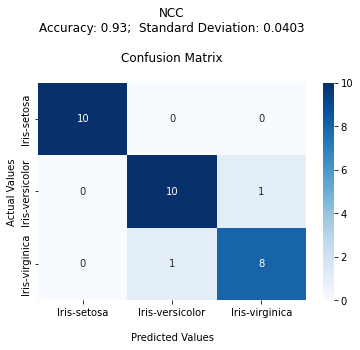

In [8]:
# Compute a confusion matrix or "matriz de confusão"
plot_acc_std_closest_cm_to_the_mean(iris, 'Class', NCC, [], 'NCC')

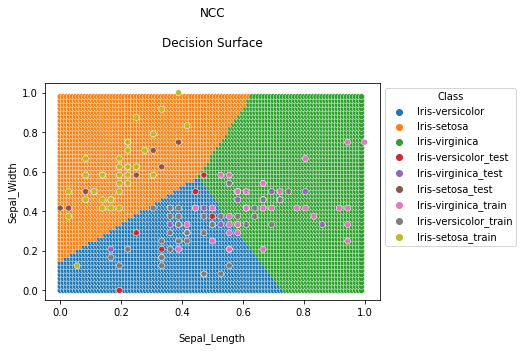

In [9]:
# Compute decision boundary or Decision Surface or "Superfície de decisão"
label_name = 'Class'
selected_feats = compute_selected_feats(iris, label_name)
ds = decision_surface(NCC(), iris, selected_feats, label_name)
plot_scatter(ds, selected_feats, label_name, 'NCC\n\nDecision Surface')

# Coluna Dataset

In [10]:

# Download Coluna dataset
download_file('https://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip')
# unzip the vertebral_column_data file
os.system('sudo apt install unzip & unzip vertebral_column_data.zip')

1

In [11]:
# Load Coluna dataset as a pandas DataFrame
coluna_features = [
'pelvic_incidence',
'pelvic_tilt',
'lumbar_lordosis_angle',
'sacral_slope',
'pelvic_radius',
'degree_spondylolisthesis',
'label'
]
coluna = pd.read_csv('./datasets/column_3C.dat',  sep=' ', names=coluna_features, header=None)
coluna.head(2)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH


In [12]:

# Normalize Coluna dataset (0 - 1)
features = coluna.columns[:-1]
normalize_data(coluna, features)
coluna.head(2)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,label
0,0.355710,0.519829,0.229193,0.250879,0.307452,0.025163,DH
1,0.124518,0.296713,0.098622,0.144642,0.476718,0.036359,DH


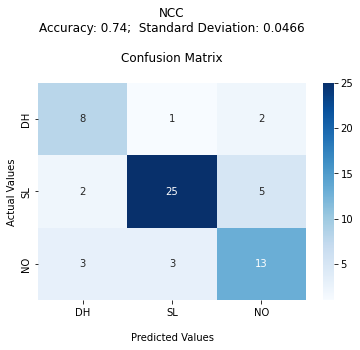

In [13]:
# Compute a confusion matrix or "matriz de confusão"
label_name = 'label'
plot_acc_std_closest_cm_to_the_mean(coluna, label_name, NCC, [], 'NCC')

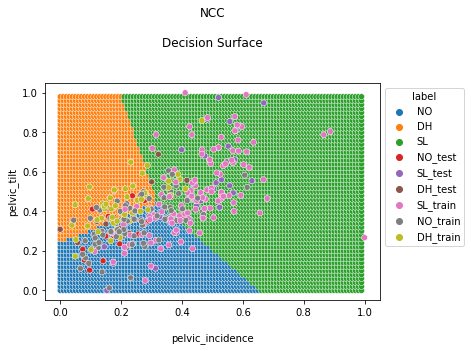

In [14]:
selected_feats = compute_selected_feats(coluna, label_name)
ds = decision_surface(NCC(), coluna, selected_feats, label_name)
plot_scatter(ds, selected_feats, label_name, 'NCC\n\nDecision Surface')

## Breast Cancer Wisconsin (Diagnostic) DataSet

In [5]:
download_file('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')

In [6]:
wdbc_column_names = [
    "id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",
]
breast_cancer_wisconsin = pd.read_csv('./datasets/wdbc.data', names=wdbc_column_names, sep=',')
breast_cancer_wisconsin = breast_cancer_wisconsin.drop(columns=['id'])
breast_cancer_wisconsin.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
label_column = 'diagnosis'
# Normalize dataset
features = breast_cancer_wisconsin.drop(columns=[label_column]).columns
breast_cancer_wisconsin = normalize_data(breast_cancer_wisconsin, features)
breast_cancer_wisconsin.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878


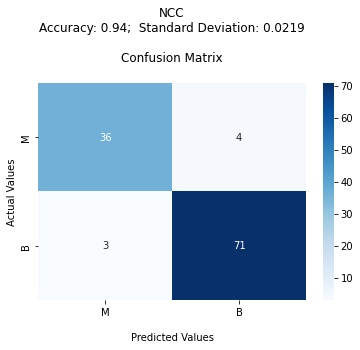

In [8]:
dataset = breast_cancer_wisconsin
# Compute a confusion matrix or "matriz de confusão"
plot_acc_std_closest_cm_to_the_mean(dataset, label_column, NCC, [], 'NCC')

In [9]:
# Get the two feats, with the most high Eigenvalues, of the Dataset
selected_feats = compute_selected_feats(dataset, label_column)

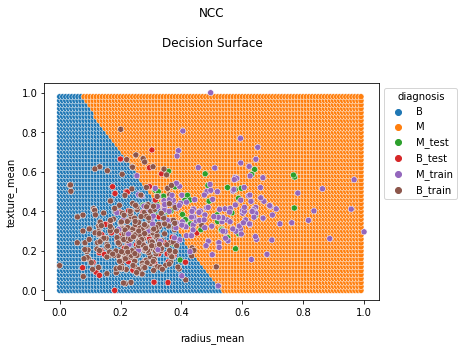

In [11]:
# Compute decision boundary or Decision Surface or "Superfície de decisão"
df = decision_surface(NCC(), dataset, selected_feats, label_column)
plot_scatter(df, selected_feats, label_column, 'NCC\n\nDecision Surface')

## Dermatology Dataset

In [12]:
download_file('https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data')

In [13]:
dermatology_column_names = [
      'erythema',
      'scaling',
      'definite borders',
      'itching',
      'koebner phenomenon',
      'polygonal papules',
      'follicular papules',
      'oral mucosal involvement',
      'knee and elbow involvement',
      'scalp involvement',
      'family history',
      'melanin incontinence',
      'eosinophils in the infiltrate',
      'PNL infiltrate',
      'fibrosis of the papillary dermis',
      'exocytosis',
      'acanthosis',
      'hyperkeratosis',
      'parakeratosis',
      'clubbing of the rete ridges',
      'elongation of the rete ridges',
      'thinning of the suprapapillary epidermis',
      'spongiform pustule',
      'munro microabcess',
      'focal hypergranulosis',
      'disappearance of the granular layer',
      'vacuolisation and damage of basal layer',
      'spongiosis',
      'saw-tooth appearance of retes',
      'follicular horn plug',
      'perifollicular parakeratosis',
      'inflammatory monoluclear inflitrate',
      'band-like infiltrate',
      'Age',
      'Class',
]
dermatology = pd.read_csv('./datasets/dermatology.data', names=dermatology_column_names, sep=',')
dermatology.head(2)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1


In [14]:
label_column = 'Class'
missing_value = '?'
# Replacing missing values by the mean
unique_values = list(dermatology['Age'].unique())
unique_values.remove(missing_value)
mean_without_misses  = compute_mean(dermatology['Age'].filter(items=unique_values))
dermatology['Age'] = dermatology['Age'].apply(lambda v: mean_without_misses if v == missing_value else float(v))

In [15]:
# Normalize dataset
features = dermatology.drop(columns=[label_column]).columns
dermatology = normalize_data(dermatology, features)
dermatology.head(2)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
0,0.666667,0.666667,0.0,1.000000,0.000000,0.0,0.0,0.0,0.333333,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.733333,2
1,1.000000,1.000000,1.0,0.666667,0.333333,0.0,0.0,0.0,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.106667,1


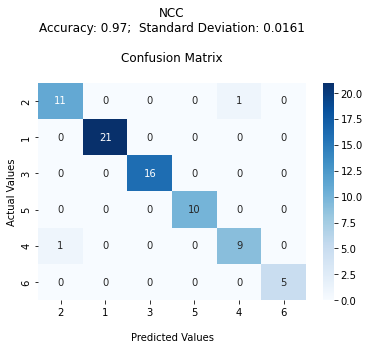

In [17]:
# Compute a confusion matrix or "matriz de confusão"
plot_acc_std_closest_cm_to_the_mean(dermatology, label_column, NCC, [], 'NCC')

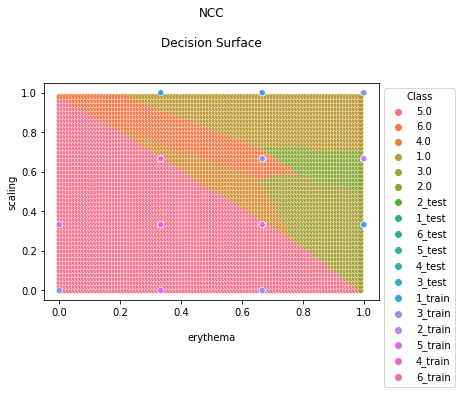

In [18]:
selected_feats = compute_selected_feats(dermatology, label_column)
df = decision_surface(NCC(), dermatology, selected_feats, label_column)
plot_scatter(df, selected_feats, label_column, 'NCC\n\nDecision Surface')

# Artifical Dataset

In [22]:
# Generate dataset, Artificial II
dataset_size = 150
noise = 0.1
centroid_size = int(dataset_size / 3)
classe1_size = centroid_size
classe2_size = centroid_size
classe3_size = centroid_size
c1_centroids = [
    [0.25, 0.75],
]
c2_centroids = [
    [0.75, 0.75],
]
c3_centroids = [
    [0.50, 0.25],
]
x1, x2, label = [], [], []
for centroid in c1_centroids:
    for _ in range(classe1_size):
        noise1 = random.random() * noise - noise / 2
        noise2 = random.random() * noise - noise / 2
        x1.append(centroid[0] + noise1)
        x2.append(centroid[1] + noise2)
        label.append('classe_1')
for centroid in c2_centroids:
    for _ in range(classe2_size):
        noise1 = random.random() * noise - noise / 2
        noise2 = random.random() * noise - noise / 2
        x1.append(centroid[0] + noise1)
        x2.append(centroid[1] + noise2)
        label.append('classe_2')
for centroid in c3_centroids:
    for _ in range(classe3_size):
        noise1 = random.random() * noise - noise / 2
        noise2 = random.random() * noise - noise / 2
        x1.append(centroid[0] + noise1)
        x2.append(centroid[1] + noise2)
        label.append('classe_3')

In [23]:
artificial_dataset = pd.DataFrame({
    'feature_1': x1,
    'feature_2': x2,
    'label': label
})
artificial_dataset.head(3)

,feature_1,feature_2,label
0,0.254578,0.706803,classe_1
1,0.231850,0.786344,classe_1
2,0.254757,0.746817,classe_1


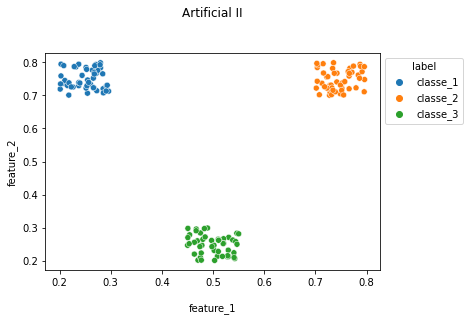

In [24]:
plot_scatter(artificial_dataset, artificial_dataset.columns, 'label', 'Artificial II')

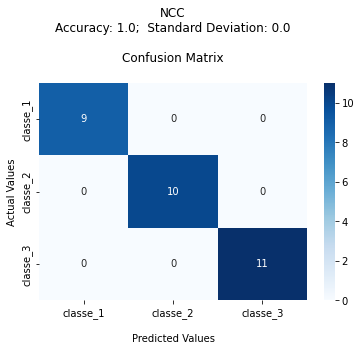

In [25]:
dataset = artificial_dataset
label_column = 'label'
# Compute a confusion matrix or "matriz de confusão"
plot_acc_std_closest_cm_to_the_mean(dataset, label_column, NCC, [], 'NCC')

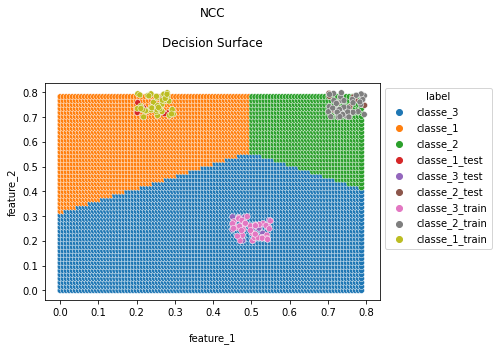

In [26]:
selected_feats = artificial_dataset.columns[:-1]
df = decision_surface(NCC(), dataset, selected_feats, label_column)
plot_scatter(df, selected_feats, label_column, 'NCC\n\nDecision Surface')